# 数值积分与数值拟合

Author: haoyanzhen
Date: 2024-12-27

数值方法是一套使用计算机进行数值求解的方法，以其快速、准确、可解非解析方程等优势得到广泛应用。

## 数值积分

数值积分是一种用于求解函数定积分的数值方法，主要用于难以找到解析解的情况。

In [2]:
from scipy.integrate import quad
import numpy as np

# 定义被积函数
def f(x):
    return np.exp(-x**2)

# 计算定积分
result, error = quad(f, 0, 1)
print("积分结果：", result)
print("估计误差：", error)

积分结果： 0.7468241328124271
估计误差： 8.291413475940725e-15


In [3]:
from scipy.integrate import simps
import numpy as np

# 定义离散点及被积函数
x = np.linspace(0, 1, 100) # 在0到1之间创建100个点
y = np.exp(-x**2) # 计算这些点上的函数值

# 使用Simpson规则进行积分
result = simps(y, x)
print("积分结果：", result)


积分结果： 0.7468241335681093


C:\Users\fight\AppData\Local\Temp\ipykernel_1220\3152375745.py:9: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  result = simps(y, x)


In [4]:
from scipy.integrate import quad
import numpy as np

# 定义被积函数
def f(x):
    return np.exp(-0.5 * x**2+x)

# 计算定积分
print(f(-10),f(10))
result, error = quad(f, -10, 20)
1/result

8.75651076269652e-27 4.248354255291589e-18


0.24197072451914337

## 数值拟合

数值拟合是一种用于根据已知数据点来估计未知数据点的方法。通过拟合，可以找到一条最能代表数据趋势的曲线。

### 一阶拟合

拟合的多项式函数：  
0.6 x + 2.2


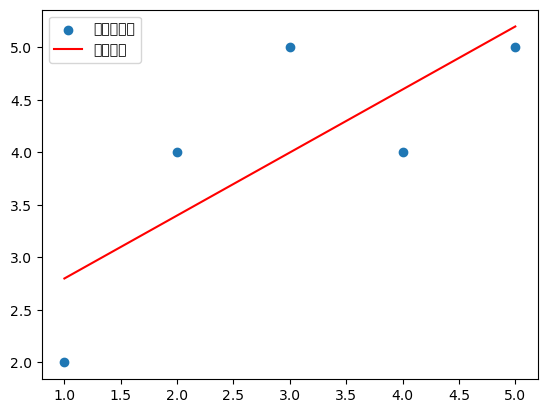

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 准备数据点
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# 进行多项式拟合，这里我们拟合一个1阶多项式（即线性拟合）
coefficients = np.polyfit(x, y, 1)
# 根据拟合系数创建多项式函数
polynomial = np.poly1d(coefficients)

# 打印拟合的多项式函数
print("拟合的多项式函数：", polynomial)

# 绘制原始数据点和拟合曲线
plt.scatter(x, y, label='原始数据点')
plt.plot(x, polynomial(x), label='拟合曲线', color='red')
plt.legend()
plt.show()


### 任意函数拟合

拟合参数： [6.39552172 0.67168446 2.75063916]
拟合误差： [0.4357177  0.08702377 0.15188939]


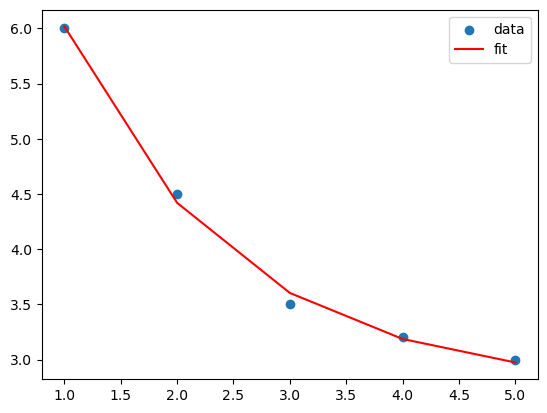

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义一个拟合函数，例如指数函数
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# 准备数据点
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([6.0, 4.5, 3.5, 3.2, 3.0])

# 使用curve_fit进行拟合
popt, pcov = curve_fit(exp_func, x_data, y_data)

# 根据拟合参数创建拟合曲线
y_fit = exp_func(x_data, *popt)

# 打印拟合参数
print("拟合参数：", popt)
print("拟合误差：", pcov)

# 绘制原始数据点和拟合曲线
plt.scatter(x_data, y_data, label='data')
plt.plot(x_data, y_fit, label='fit', color='red')
plt.legend()
plt.show()
